In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [186]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 5]
plt.style.use('seaborn')
matplotlib.rc('text', usetex=True)

In [187]:
df = pd.read_csv('./results_final.csv')

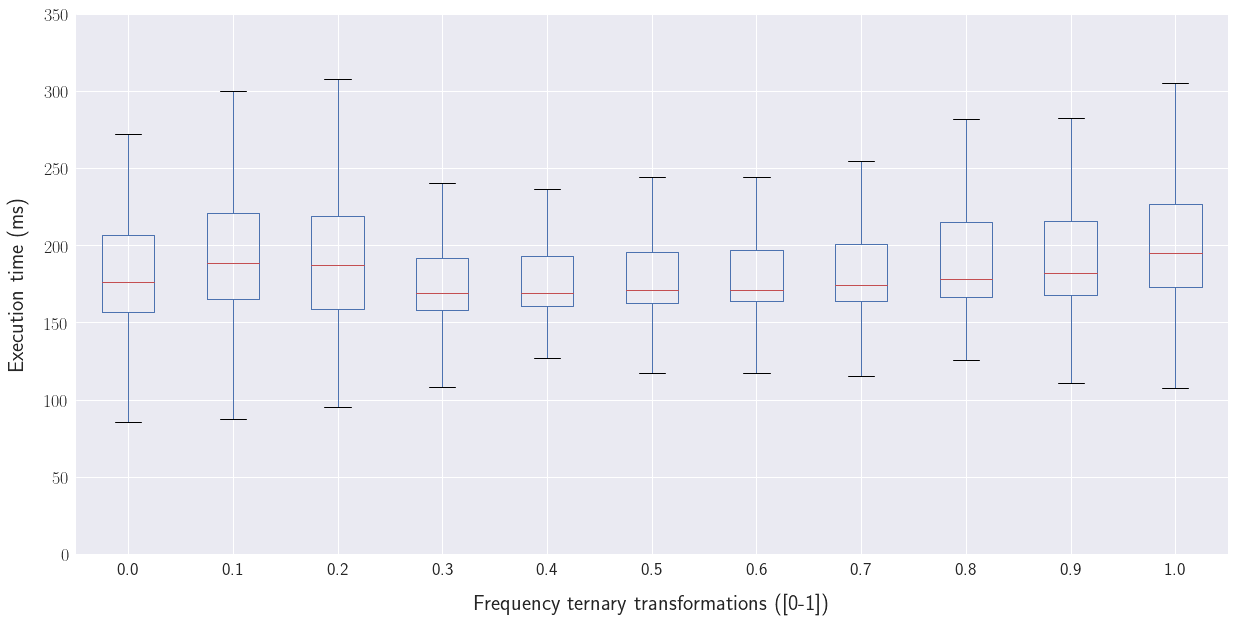

In [189]:
df[df.obfuscation == True].boxplot(column=['executionTimes'], by='ternaryFrequency')

plt.xlabel('Frequency ternary transformations ([0-1])', fontsize=22, labelpad=15)
plt.ylabel('Execution time (ms)', fontsize=22, labelpad=15)
plt.gca() \
    .get_xaxis() \
    .set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.1f}".format((x-1)/10)))

plt.gcf().set_size_inches(20, 10)
plt.gca().tick_params(axis='both', which='major', labelsize=18)
plt.gca().tick_params(axis='both', which='minor', labelsize=18)
plt.ylim([0, 350])
axes.legend([])
plt.title( '' )
plt.suptitle('') 
plt.savefig('exec_time_ternary_bp.svg')

In [201]:
def get_percentile(group):
    return np.percentile(group, 95)

print("Percentiles obfuscated:")
print(df[df.obfuscation == True].groupby('ternaryFrequency').apply(get_percentile))

Percentiles obfuscated:
ternaryFrequency
0.0    206.42000
0.1    221.04850
0.2    218.97050
0.3    192.05150
0.4    193.02750
0.5    195.93775
0.6    196.66650
0.7    200.82425
0.8    214.81325
0.9    215.38200
1.0    226.65275
dtype: float64


In [200]:
print("Percentiles not obfuscated:")
print(np.percentile(df[df.obfuscation == False], 95))

print("Percentiles obfuscated:")
print(np.percentile(df[df.obfuscation == True], 95))

Percentiles not obfuscated:
177.93574999668633
Percentiles obfuscated:
205.6149999960324


/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


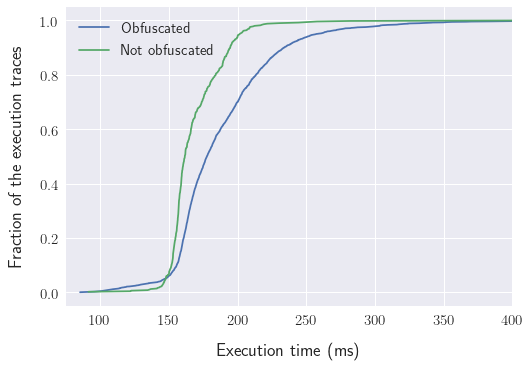

In [191]:
cumsum_obfuscated = df[df.obfuscation == True]['executionTimes'] \
    .value_counts() \
    .sort_index() \
    .cumsum()

cumsum_non_obfuscated = df[(df.obfuscation == False)]['executionTimes'] \
    .value_counts() \
    .sort_index() \
    .cumsum()

ax = (cumsum_obfuscated / cumsum_obfuscated.values[-1]).plot()
(cumsum_non_obfuscated / cumsum_non_obfuscated.values[-1]).plot()
ax.legend(["Obfuscated", "Not obfuscated"], fontsize=15);

plt.xlabel('Execution time (ms)', fontsize=18, labelpad=15)
plt.ylabel('Fraction of the execution traces', fontsize=18, labelpad=15)
plt.gca().tick_params(axis='both', which='major', labelsize=15)
plt.gca().tick_params(axis='both', which='minor', labelsize=15)
plt.xlim([75, 400])
plt.savefig('cdf_exec.svg')

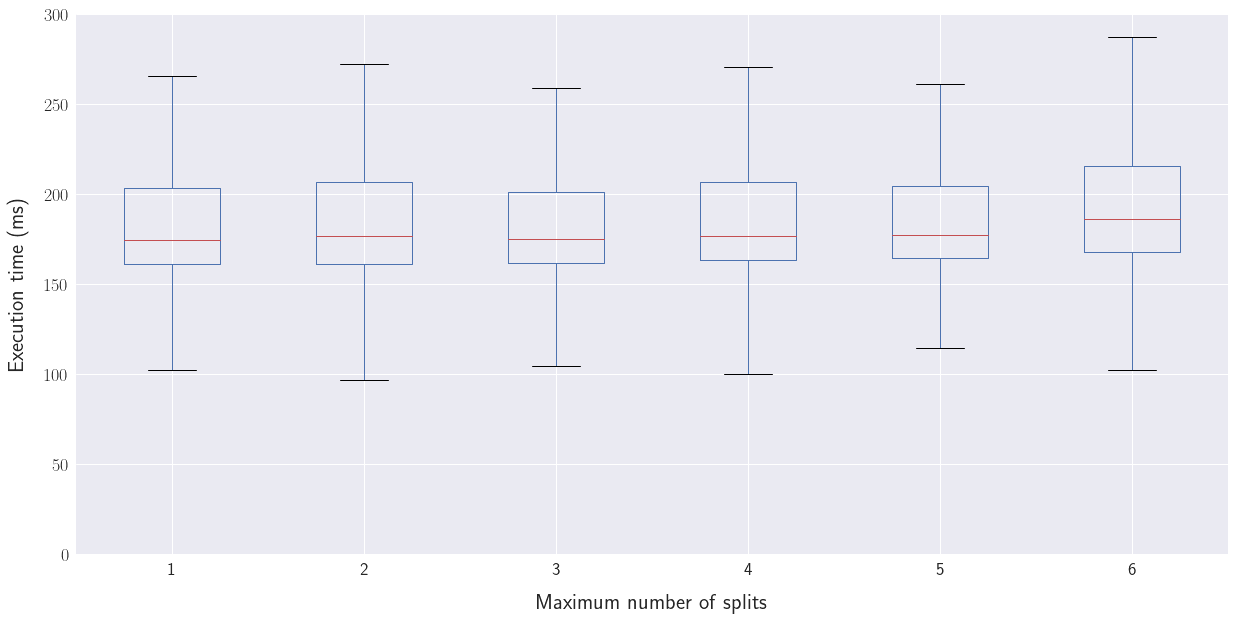

In [192]:
df[df.obfuscation == True].boxplot(column=['executionTimes'], by='maxSplits')

plt.xlabel('Maximum number of splits', fontsize=22, labelpad=15)
plt.ylabel('Execution time (ms)', fontsize=22, labelpad=15)
plt.gcf().set_size_inches(20, 10)
plt.gca().tick_params(axis='both', which='major', labelsize=18)
plt.gca().tick_params(axis='both', which='minor', labelsize=18)
plt.ylim([0, 300])
axes.legend([])
plt.title( '' )
plt.suptitle('') 
plt.savefig('exec_time_splits_bp.svg')

In [202]:
def get_percentile(group):
    return np.percentile(group, 95)

print("Percentiles obfuscated:")
print(df[df.obfuscation == True].groupby('maxSplits').apply(get_percentile))

Percentiles obfuscated:
maxSplits
1    203.03925
2    206.35875
3    200.91450
4    206.36250
5    204.33425
6    215.60200
dtype: float64


In [203]:
df_size = pd.read_csv('results_size_files.csv')
print(df_size[df_size.obfuscation == False])

      obfuscation  encodingFrequency  ternaryFrequency  maxSplits  fileSizes
6600        False               -1.0              -1.0         -1       5487


Percentiles:
ternaryFrequency
0.0    12.5175
0.1    13.4560
0.2    14.2310
0.3    15.0310
0.4    15.8695
0.5    16.6070
0.6    17.3675
0.7    18.2265
0.8    18.9355
0.9    19.6320
1.0    20.3815
dtype: float64


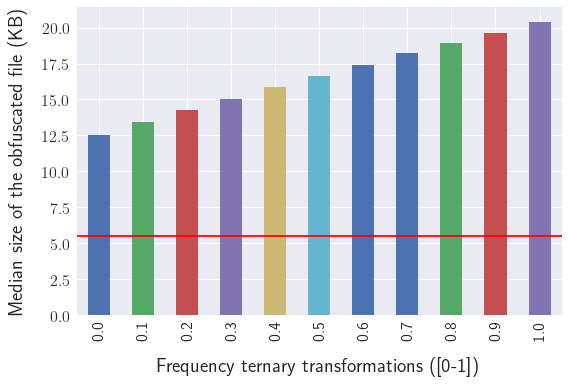

In [194]:
def get_median(group):
    return np.percentile(group['fileSizes'], 50)/1000

non_obfuscated_size = df_size[df_size.obfuscation == False].fileSizes.values[0]/1000

df_size[df_size.obfuscation == True].groupby('ternaryFrequency').apply(get_median).plot(kind="bar")
plt.axhline(y=non_obfuscated_size, color='r', linestyle='-')
plt.gca() \
    .get_xaxis() \
    .set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.1f}".format((x)/10)))

plt.ylabel('Median size of the obfuscated file (KB)', fontsize=20, labelpad=15)
plt.xlabel('Frequency ternary transformations ([0-1])', fontsize=20, labelpad=15)
plt.gca().tick_params(axis='both', which='major', labelsize=16)
plt.gca().tick_params(axis='both', which='minor', labelsize=16)
plt.gcf().tight_layout()
plt.savefig('bar_filesize_ternary.svg')

print("Percentiles:")
print(df_size[df_size.obfuscation == True].groupby('ternaryFrequency').apply(get_median))

Percentiles:
maxSplits
1    16.1840
2    16.2145
3    16.1885
4    17.0930
5    18.1570
6    19.3500
dtype: float64


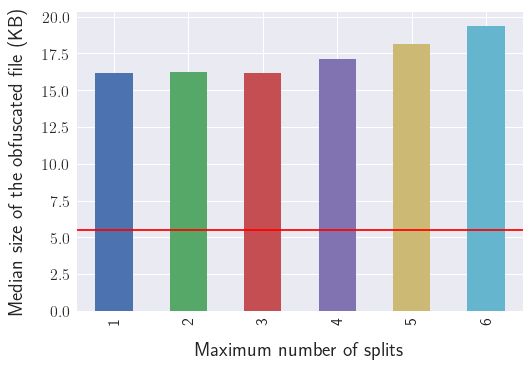

In [195]:
def get_median(group):
    return np.percentile(group['fileSizes'], 50)/1000

df_size[df_size.obfuscation == True].groupby('maxSplits').apply(get_median).plot(kind="bar")
non_obfuscated_size = df_size[df_size.obfuscation == False].fileSizes.values[0]/1000
plt.axhline(y=non_obfuscated_size, color='r', linestyle='-')

plt.ylabel('Median size of the obfuscated file (KB)', fontsize=20, labelpad=15)
plt.xlabel('Maximum number of splits', fontsize=20, labelpad=15)
plt.gca().tick_params(axis='both', which='major', labelsize=16)
plt.gca().tick_params(axis='both', which='minor', labelsize=16)
plt.savefig('bar_filesize_maxsplits.svg')

print("Percentiles:")
print(df_size[df_size.obfuscation == True].groupby('maxSplits').apply(get_median))

In [196]:
print("Median size for ternaryFrequency = 0.4 and maxSplits = 3")
print(np.percentile(df_size[(df_size.ternaryFrequency == 0.4) & (df_size.maxSplits == 3)].fileSizes, 50)/1000)

Median size for ternaryFrequency = 0.4 and maxSplits = 3
15.4505


In [207]:
print("Execution times for scripts obfuscated with 0.4 and maxSplits = 3 vs no obfuscation")
print(np.percentile(df[(df.ternaryFrequency == 0.4) & (df.maxSplits == 3)].executionTimes, 50))
print(np.percentile(df[df.obfuscation == False].executionTimes, 50))

Execution times for scripts obfuscated with 0.4 and maxSplits = 3 vs no obfuscation
165.5050000117626
161.53500000655185
